<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Deep_Learning/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

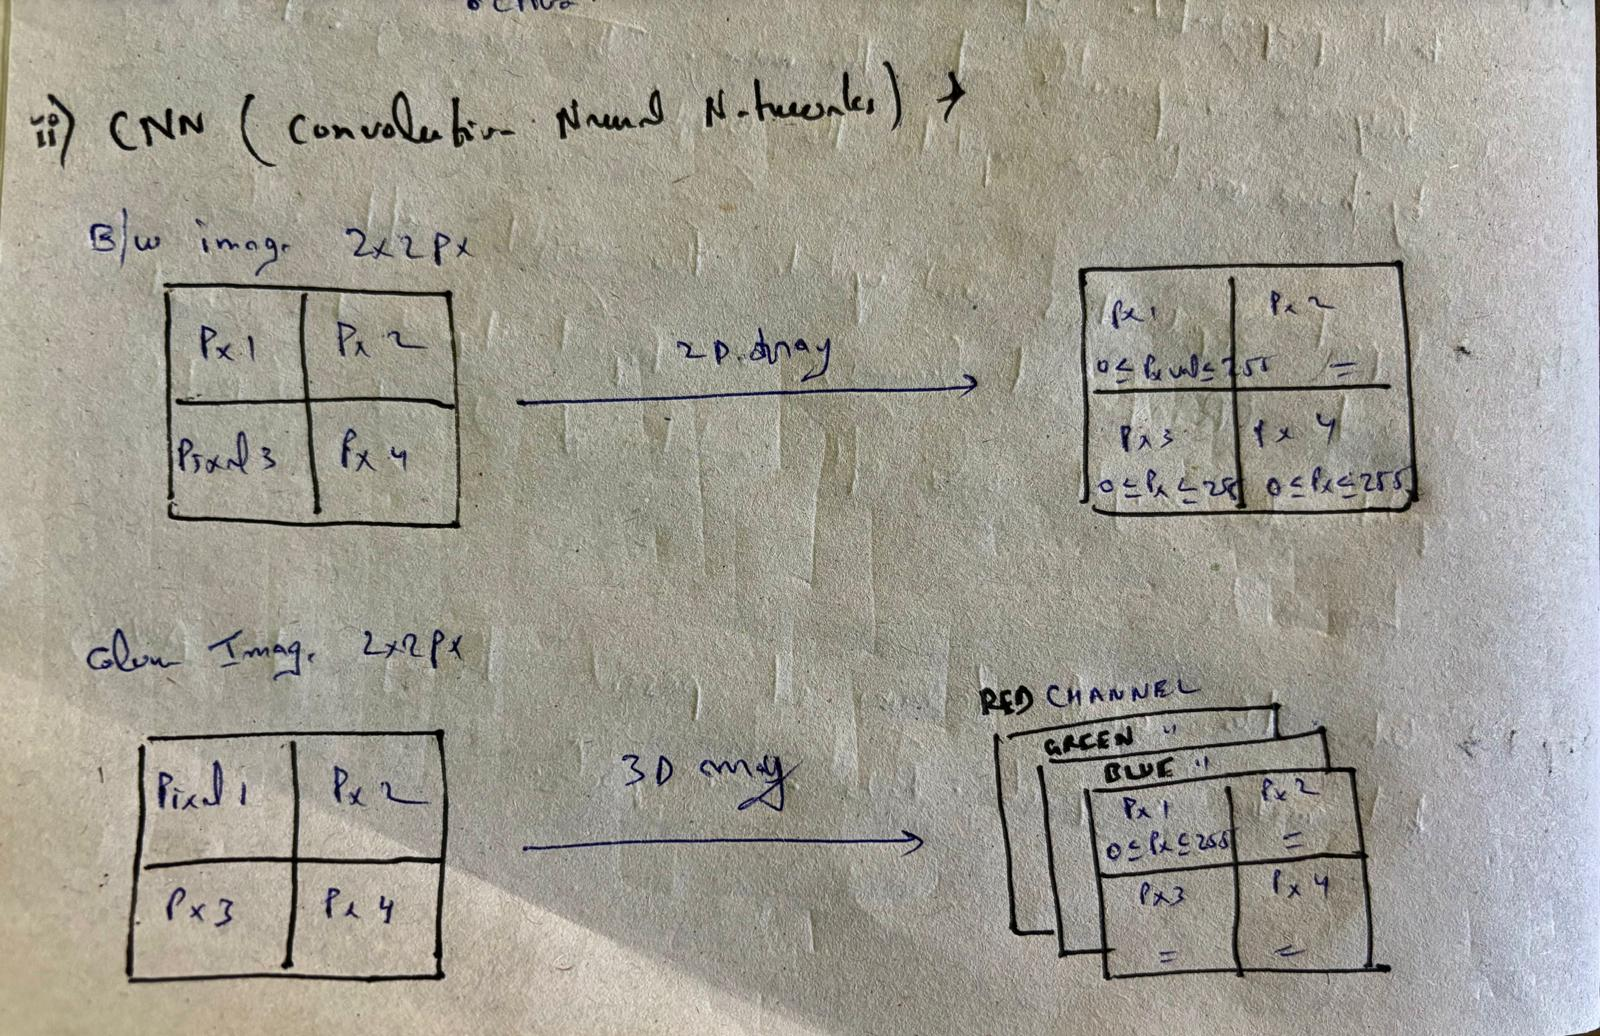

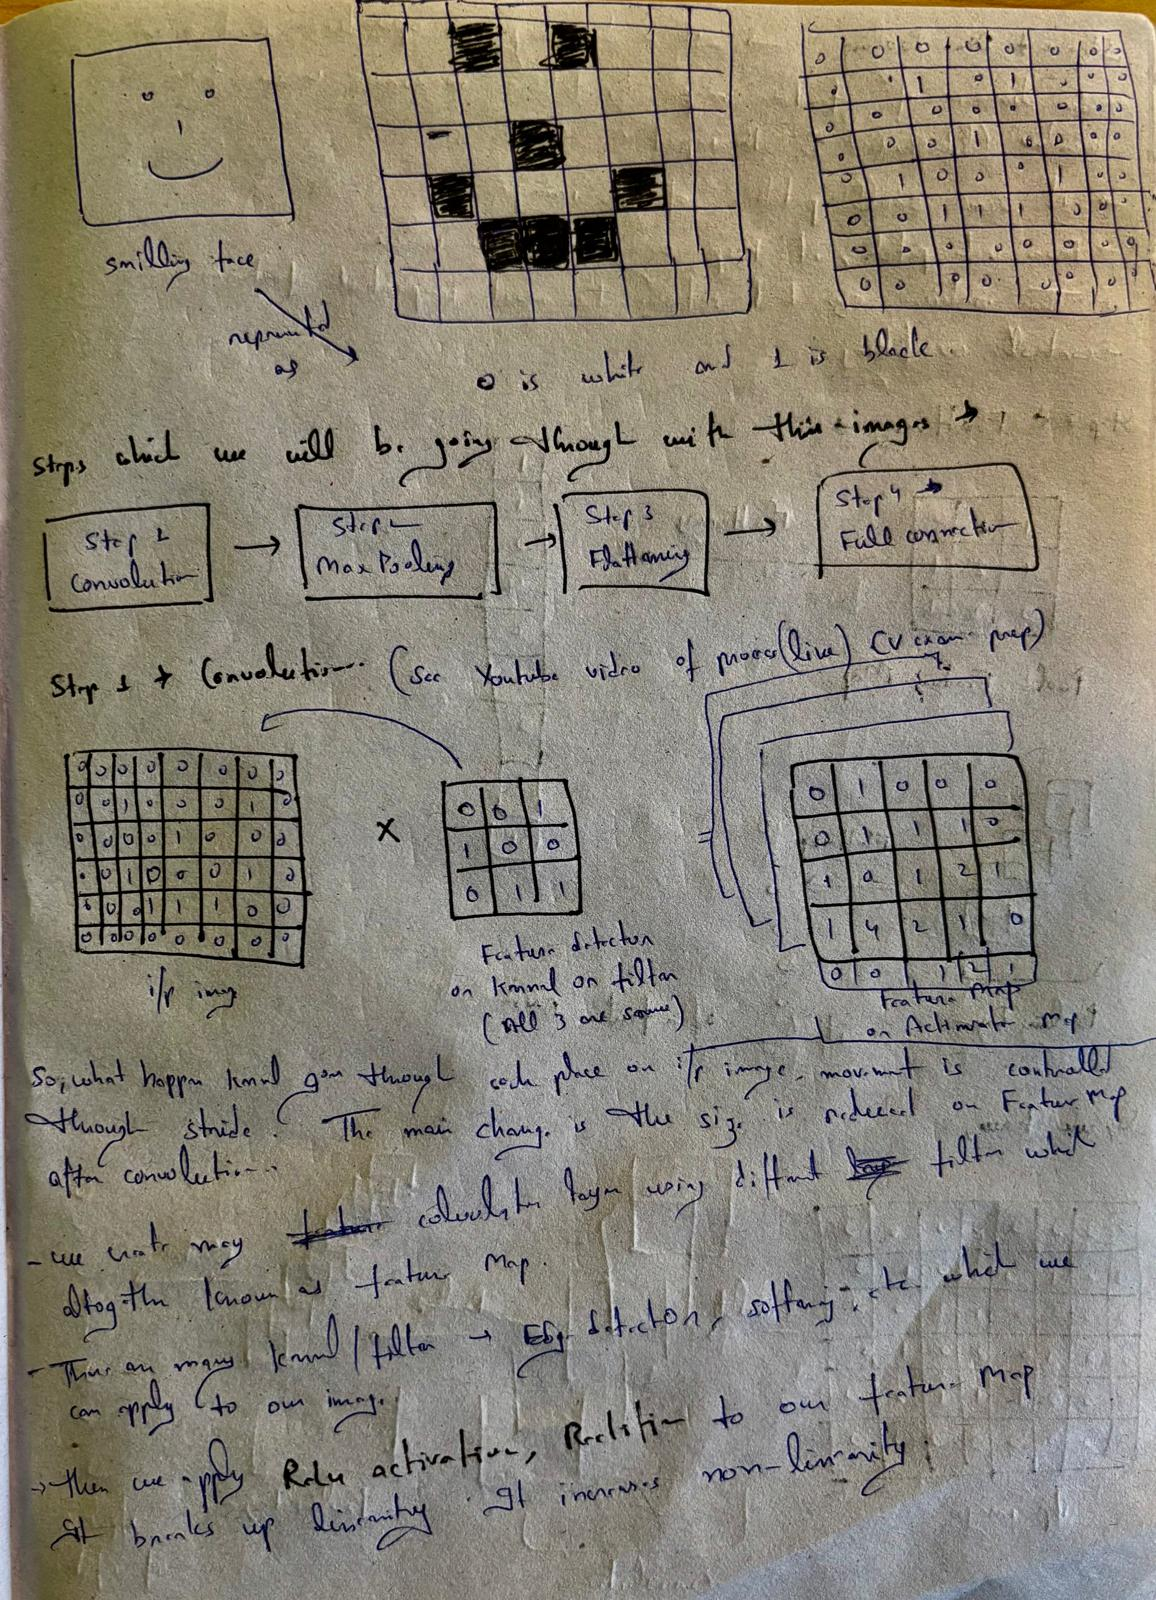

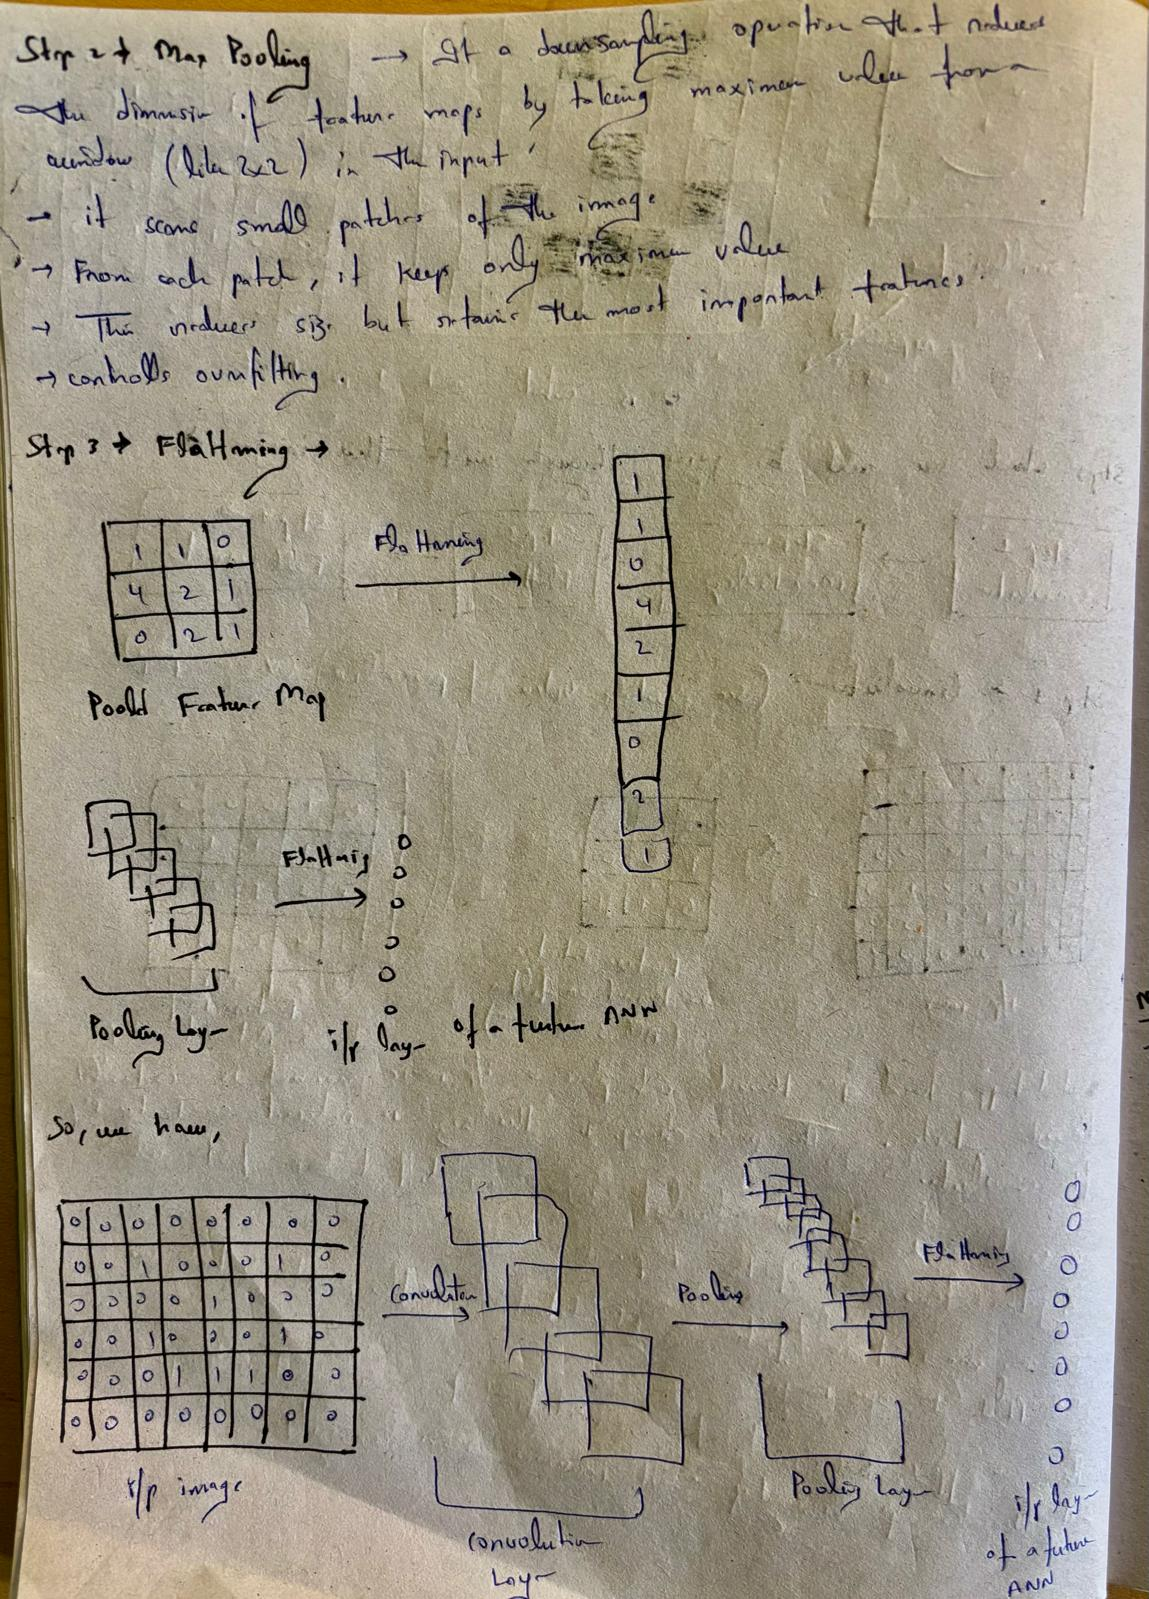

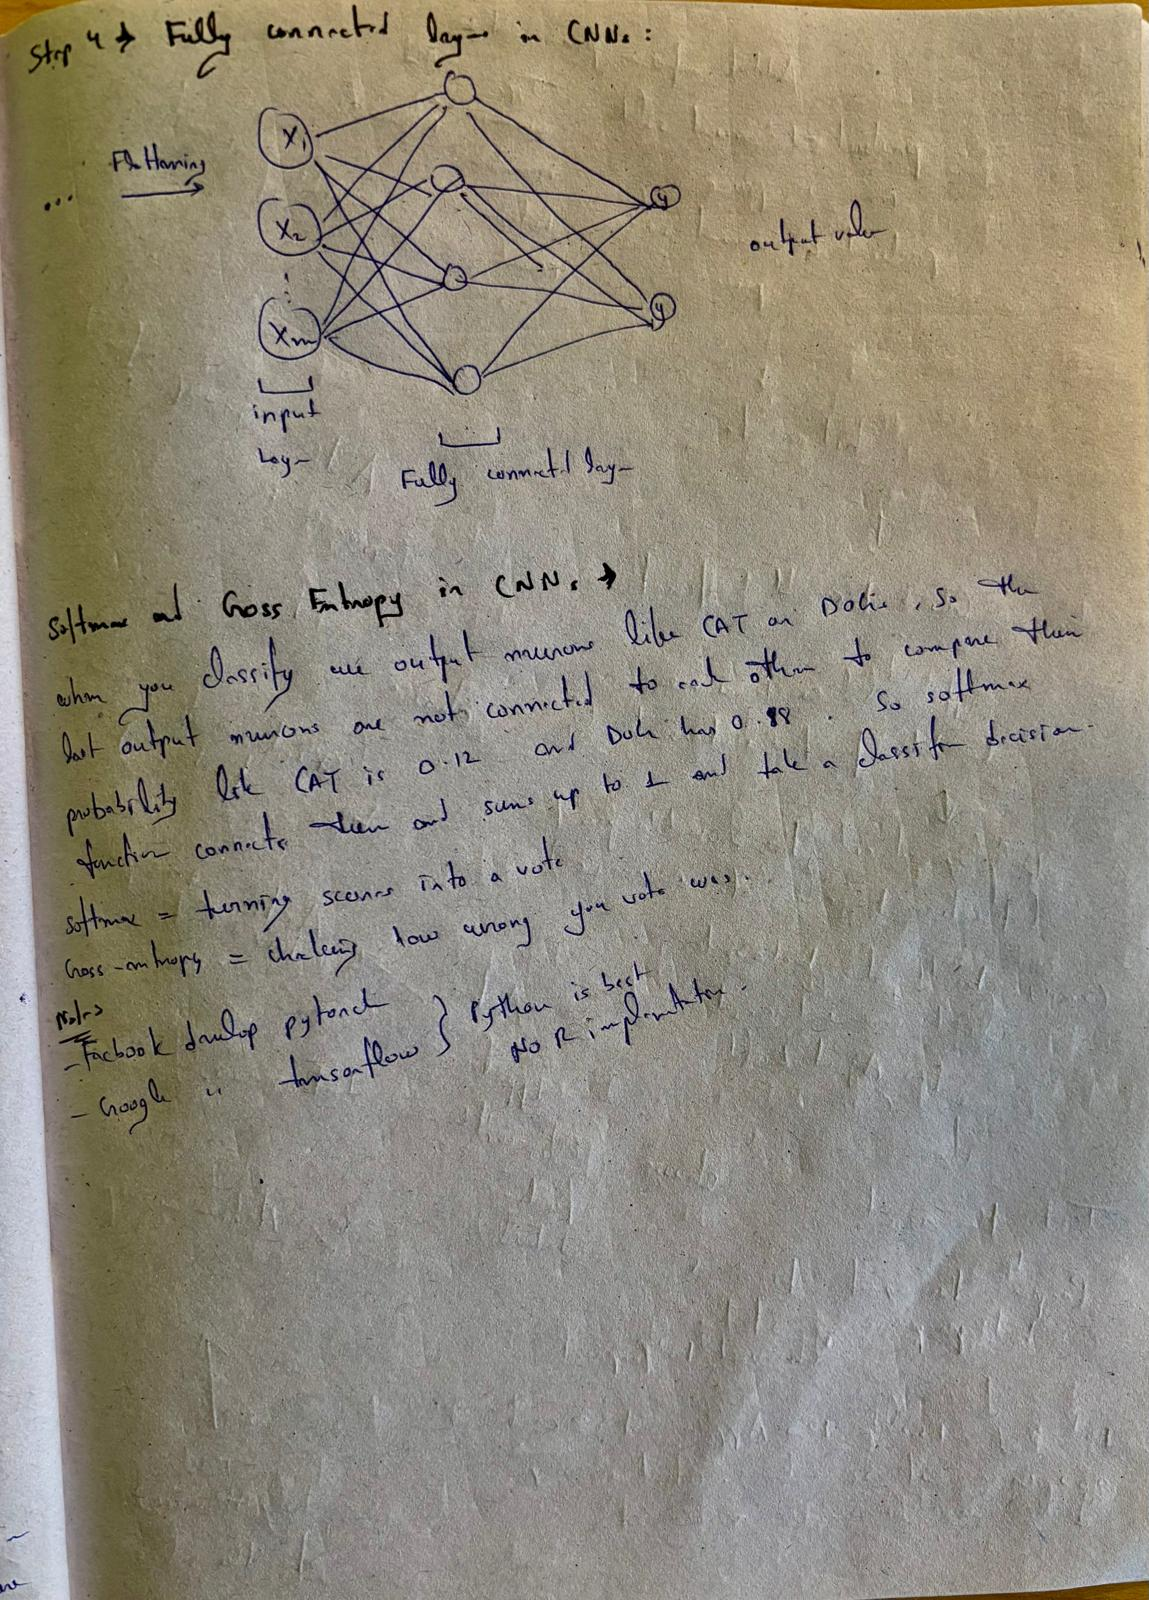

### Importing the libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

## Part 1 - Loading and preprocessing the dataset

In [2]:
(dataset, info) = tfds.load(
   # 'oxford_iiit_pet',
   'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True  # returns (image, label)
)

train_ds, val_ds = dataset


In [3]:
IMG_SIZE = 128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # normalize to [0,1]
    return image, label

BATCH_SIZE = 32

train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


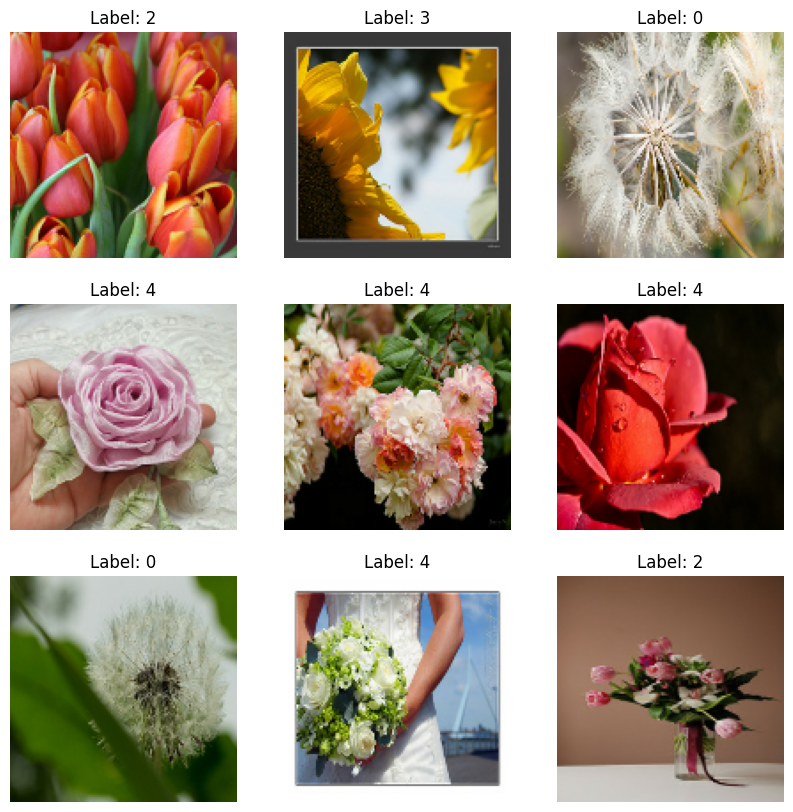

In [4]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
    plt.show()


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=[IMG_SIZE, IMG_SIZE, 3]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a 3rd convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [14]:
cnn.fit(x = train_ds, validation_data = val_ds, epochs = 11)

Epoch 1/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step - accuracy: 0.3401 - loss: 1.4477 - val_accuracy: 0.5218 - val_loss: 1.1752
Epoch 2/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5687 - loss: 1.0952 - val_accuracy: 0.6390 - val_loss: 0.9659
Epoch 3/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6614 - loss: 0.9068 - val_accuracy: 0.6785 - val_loss: 0.8425
Epoch 4/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7057 - loss: 0.7874 - val_accuracy: 0.6757 - val_loss: 0.8483
Epoch 5/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7547 - loss: 0.6808 - val_accuracy: 0.6649 - val_loss: 0.9146
Epoch 6/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7868 - loss: 0.5606 - val_accuracy: 0.6907 - val_loss: 0.8873
Epoch 7/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8510 - loss: 0.4217 - val_accuracy: 0.6335 - val_loss: 1.0869
Epoch 8/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8542 - loss: 0.4036 - val_accuracy: 0.6798 - 

## Part 4 - Making a single prediction

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/pexels-photo-11780184.jpeg', target_size = (IMG_SIZE, IMG_SIZE))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

# Get class names from the dataset info
class_names = info.features['label'].names

# Get the index of the predicted class
predicted_class_index = np.argmax(result[0])

# Get the predicted class name
prediction = class_names[predicted_class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


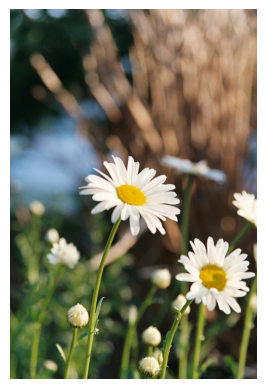

In [23]:
plt.imshow(image.load_img('/content/pexels-photo-11780184.jpeg'))
plt.axis('off')
plt.show()

In [25]:
print(prediction)

daisy
